# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Read Solar Energy Production Dataset

In [2]:
data = pd.read_csv('F:\APU\FYP\Dataset\Cleaned_data\solar_production_dataset.csv')

data.head()

,Country,Date,Value,Daylight,Temperature,GHI,DNI
0,Australia,2023-03-01,4055.6634,734.69403,26.204160,894897.94,693884.56
1,Australia,2023-02-01,4466.4801,778.22370,27.318323,997130.10,756902.75
2,Australia,2023-01-01,4967.0119,812.18915,27.128540,1009778.60,739408.44
3,Australia,2022-12-01,5179.1465,822.62040,26.521873,1087540.60,817223.80
4,Australia,2022-11-01,4548.5315,801.65320,23.784800,1055200.00,791037.10


## Extract Data for each country

In [3]:
countries = data['Country'].unique()

solar_production_data = {}

# use loc() function to select data from a DataFrame based on specified row and column labels or conditions.
# Iterate over the countries
for country in countries:
    # Filter the data for the current country and 'solar' product
    country_energy_production = data.loc[
        (data['Country'] == country), ['Date', 'Value', 'Daylight', 'Temperature', 'GHI', 'DNI']
    ]
    
    # Store the filtered data in the dictionary
    solar_production_data[country] = country_energy_production.reset_index(drop=True)

solar_production_data['Germany']

,Date,Value,Daylight,Temperature,GHI,DNI
0,2023-03-01,3958.9156,713.27290,5.751395,378630.400,181297.770
1,2023-02-01,2482.8218,599.84460,3.328918,238932.110,126700.960
2,2023-01-01,901.8999,507.79890,3.692062,107977.336,36078.707
3,2022-12-01,691.2992,477.55484,1.911943,90383.530,33390.670
4,2022-11-01,1792.4670,534.89905,6.498527,159097.670,74527.700
...,...,...,...,...,...,...
154,2010-05-01,1101.9960,935.66046,10.510657,606279.900,285039.220
155,2010-04-01,1366.0630,832.18036,8.848589,725648.500,465178.030
156,2010-03-01,1026.9540,713.89624,4.317392,429648.000,224533.280
157,2010-02-01,533.2110,600.43414,-0.348000,231205.080,88738.740


# Resample to daily data

In [4]:
# hypro_production_data
for country_data in solar_production_data:
    
    # set time as the index
    solar_production_data[country_data]['Date'] = pd.to_datetime(solar_production_data[country_data]['Date'])
    solar_production_data[country_data].set_index('Date', inplace=True)
    
    # divide the monthly statistical production value by the number of days 
    # of the month to get the avarage daily production value
    solar_production_data[country_data]['Value'] = (solar_production_data[country_data]['Value']/
                                                    solar_production_data[country_data].index.days_in_month)
    
    # resample the monthly index to daily and impute the missing value with linear interpolate method
    daily_data = solar_production_data[country_data].resample('D').interpolate('linear')
    solar_production_data[country_data] = daily_data
    
solar_production_data['Germany']

,Value,Daylight,Temperature,GHI,DNI
Date,,,,,
2010-01-01,13.672000,508.175450,-3.488258,129072.890000,43339.637000
2010-01-02,13.845266,511.151537,-3.386960,132367.476774,44804.124194
2010-01-03,14.018532,514.127624,-3.285661,135662.063548,46268.611387
2010-01-04,14.191798,517.103710,-3.184362,138956.650323,47733.098581
2010-01-05,14.365065,520.079797,-3.083064,142251.237097,49197.585774
...,...,...,...,...,...
2023-02-25,122.130562,697.068857,5.405327,358673.501429,173498.225714
2023-02-26,123.524660,701.119868,5.491844,363662.726071,175448.111786
2023-02-27,124.918759,705.170879,5.578361,368651.950714,177397.997857


# Model Building

### Split train and test data

In [5]:
data = solar_production_data['Germany']

# Split the data into training and testing sets
split_date = '2021-01-01'
train, test = data[:split_date], data[split_date:]

print(train.head())
print(train.shape)
print()
print(test.head())
print(test.shape)

                Value    Daylight  Temperature            GHI           DNI
Date                                                                       
2010-01-01  13.672000  508.175450    -3.488258  129072.890000  43339.637000
2010-01-02  13.845266  511.151537    -3.386960  132367.476774  44804.124194
2010-01-03  14.018532  514.127624    -3.285661  135662.063548  46268.611387
2010-01-04  14.191798  517.103710    -3.184362  138956.650323  47733.098581
2010-01-05  14.365065  520.079797    -3.083064  142251.237097  49197.585774
(4019, 5)

                Value    Daylight  Temperature            GHI           DNI
Date                                                                       
2021-01-01  20.411177  508.955050     0.758759  109978.360000  35825.180000
2021-01-02  22.122451  511.944394     0.792878  114878.310645  39182.392903
2021-01-03  23.833724  514.933737     0.826997  119778.261290  42539.605806
2021-01-04  25.544998  517.923081     0.861116  124678.211935  45896.818710
2

## Univariate Model - ARIMA - Daily

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#### The developer has use R with the auto.arima() function to identify the p, q, d value of the best fit ARIMA model for this dataset, the result shows that the order(p, q, d) = (1,1,2)(0,1,0)[365] 

#### Figure below show the result from R:
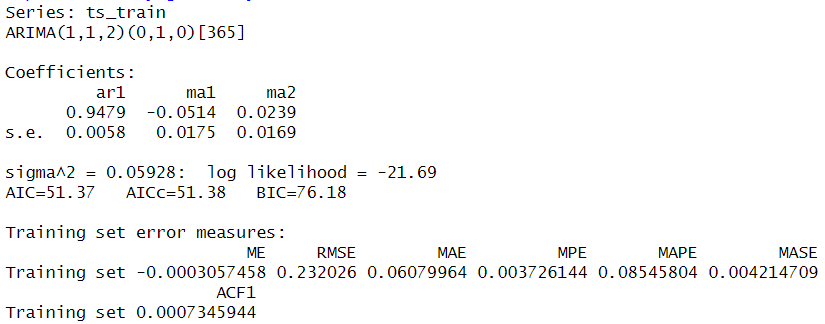

In [58]:
import rpy2.robjects as robjects
# Load the 'forecast' R package
robjects.r("library(forecast)")

# Load the ARIMA model
r_load = robjects.r['readRDS']
ger_solar_arima_model = r_load(r"F:\APU\FYP\SEM 2\Report Doc\R script\ger_solar_arima_model.rds")

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package 'forecast' was built under R version 4.1.3 



In [59]:
# Generate predictions
r_forecast = robjects.r['forecast']
predictions = r_forecast(ger_solar_arima_model, h=len(test))

# Evaluate the model performance
print("Mean Absolute Error: ", mean_absolute_error(predictions.rx('mean')[0], test['Value'].values))
mse = mean_squared_error(predictions.rx('mean')[0], test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", math.sqrt(mse))

Mean Absolute Error:  48.32814319020563
Mean Squared Error:  3236.153475948426
Root Mean Squared Error:  56.88719957906547


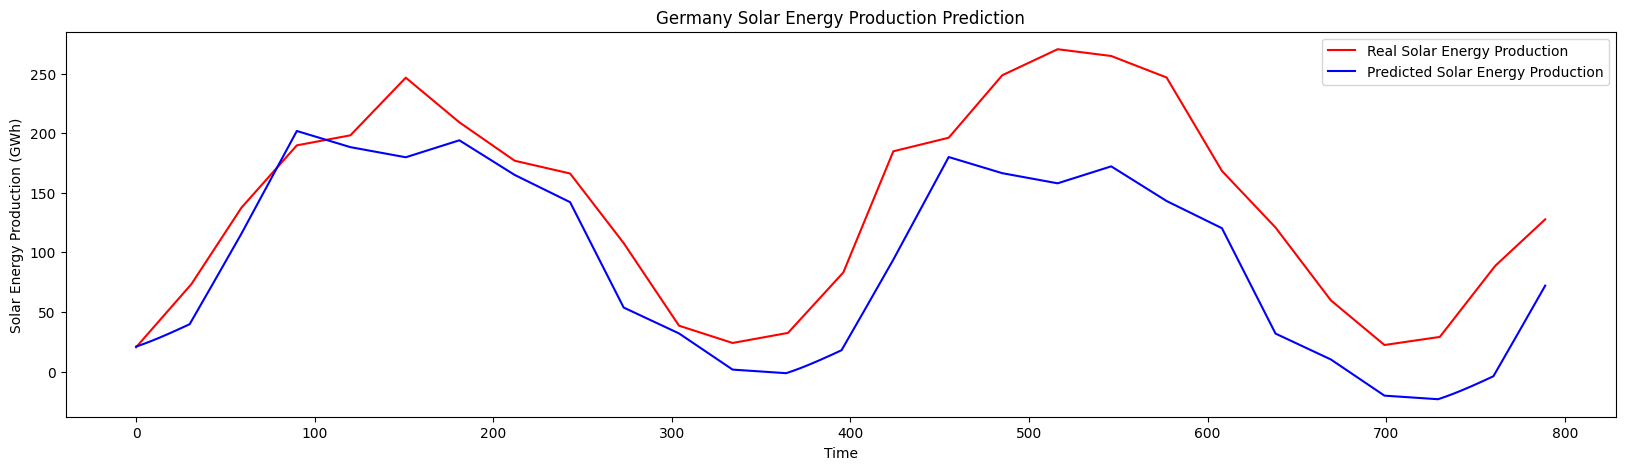

In [60]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(predictions.rx('mean')[0], color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('Germany Solar Energy Production Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy Production (GWh)')
plt.legend()
plt.show()

## SVM - Univariate

In [10]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['Value']].values)
test_scaled = scaler.transform(test[['Value']].values)

# Reshape the input data
time_steps = 365  # Define the number of previous time steps to consider

# Creating a data structure with 365 timestamps and 1 output
x_train = []
y_train = []
for i in range(time_steps, len(train)):
    x_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape, y_train.shape)

(3654, 365) (3654,)


In [92]:
# Build and Train the SVM Model
ger_daily_svr = SVR(kernel='linear',gamma=0.5, C=0.1, epsilon = 0.01) # Specify hyperparameters
ger_daily_svr.fit(x_train, y_train)

SVR(C=0.1, epsilon=0.01, gamma=0.5, kernel='linear')

In [93]:
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(time_steps, len(test)+time_steps):
    x_test.append(inputs[i-time_steps:i, 0])
x_test = np.array(x_test)

# Predict Solar Energy Production
svr_y_pred = ger_daily_svr.predict(x_test).reshape(-1,1)
svr_y_pred = scaler.inverse_transform(svr_y_pred)
print(svr_y_pred.shape)

(790, 1)


In [94]:
print(inputs)

[[0.12959798]
 [0.13311746]
 [0.13663693]
 ...
 [0.53055812]
 [0.53704158]
 [0.54352505]]


In [95]:
# Evaluate the model
print("Mean Absolute Error: ", mean_absolute_error(svr_y_pred, test['Value'].values))
mse = mean_squared_error(svr_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  1.3423611865609004
Mean Squared Error:  2.797720771060372
Root Mean Squared Error:  1.6726388645073305


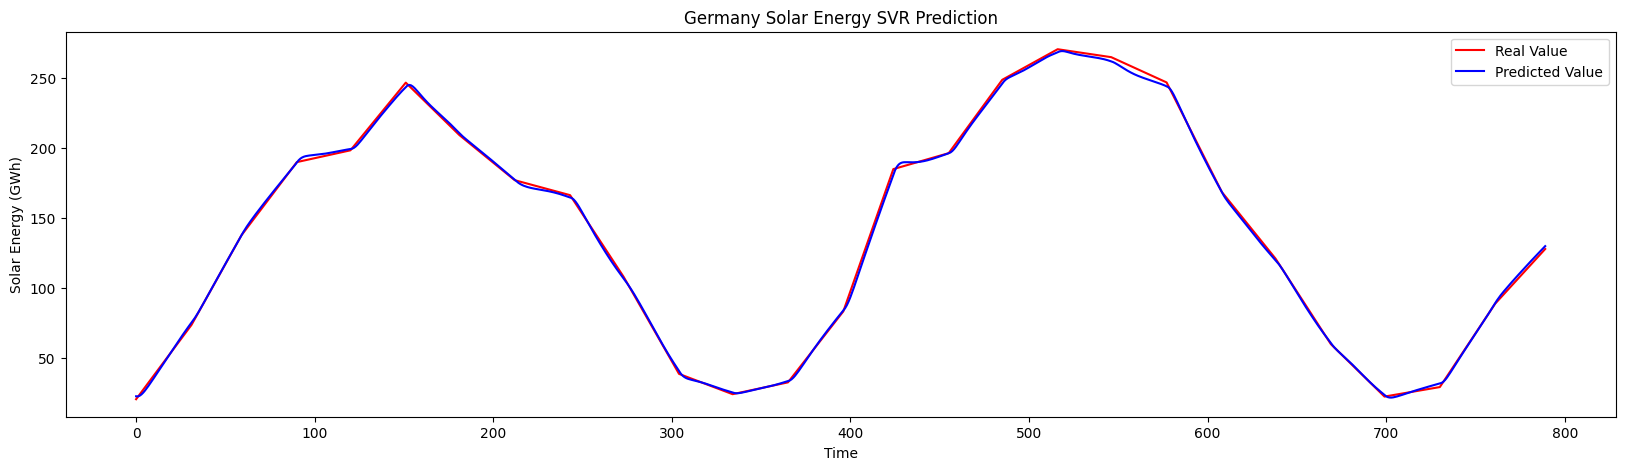

In [96]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color='red', label='Real Value')
plt.plot(svr_y_pred, color='blue', label='Predicted Value')
plt.title('Germany Solar Energy SVR Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate GRU - Daily

In [67]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)

In [68]:
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Set the number of time steps (input sequence length)
time_steps = 365

# Create the training datasets
X_train, y_train = create_dataset(training_set_scaled, time_steps)

# Create the testing datasets
X_test, y_test = create_dataset(test['Value'].values, time_steps)

In [19]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Create the model
ger_daily_gru = Sequential()
ger_daily_gru.add(GRU(units=64, return_sequences=True, input_shape=(time_steps, 1)))
ger_daily_gru.add(GRU(units=64))
ger_daily_gru.add(Dense(1, activation='linear'))

ger_daily_gru.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
ger_daily_gru.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
115/115 [==============================] - 132s 766ms/step - loss: 0.0146
Epoch 2/100
115/115 [==============================] - 76s 660ms/step - loss: 2.2063e-04
Epoch 3/100
115/115 [==============================] - 68s 595ms/step - loss: 1.6193e-04
Epoch 4/100
115/115 [==============================] - 65s 565ms/step - loss: 1.2448e-04
Epoch 5/100
115/115 [==============================] - 71s 619ms/step - loss: 9.5302e-05
Epoch 6/100
115/115 [==============================] - 71s 618ms/step - loss: 7.4656e-05
Epoch 7/100
115/115 [==============================] - 78s 682ms/step - loss: 4.4612e-05
Epoch 8/100
115/115 [==============================] - 87s 754ms/step - loss: 2.1666e-05
Epoch 9/100
115/115 [==============================] - 77s 667ms/step - loss: 1.7418e-05
Epoch 10/100
115/115 [==============================] - 80s 697ms/step - loss: 1.6528e-05
Epoch 11/100
115/115 [==============================] - 89s 773ms/step - loss: 1.3739e-05
Epoch 12/100
115/115 [

115/115 [==============================] - 95s 817ms/step - loss: 2.4111e-06
Epoch 93/100
115/115 [==============================] - 96s 836ms/step - loss: 4.7336e-06
Epoch 94/100
115/115 [==============================] - 94s 823ms/step - loss: 9.8005e-06
Epoch 95/100
115/115 [==============================] - 85s 739ms/step - loss: 3.4145e-06
Epoch 96/100
115/115 [==============================] - 102s 886ms/step - loss: 2.4757e-06
Epoch 97/100
115/115 [==============================] - 113s 977ms/step - loss: 2.7161e-06
Epoch 98/100
115/115 [==============================] - 108s 940ms/step - loss: 7.1545e-06
Epoch 99/100
115/115 [==============================] - 112s 971ms/step - loss: 5.5573e-06
Epoch 100/100
115/115 [==============================] - 115s 1000ms/step - loss: 6.9569e-06


In [69]:
# Getting the predicted value
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
X_test = np.array(X_test)

gru_y_pred = ger_daily_gru.predict(X_test)
gru_y_pred = sc.inverse_transform(gru_y_pred)

25/25 [==============================] - 47s 489ms/step


In [70]:
print("Mean Absolute Error: ", mean_absolute_error(gru_y_pred, test['Value'].values))
mse = mean_squared_error(gru_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  0.6158780663362158
Mean Squared Error:  0.49787074785402835
Root Mean Squared Error:  0.7055995662229593


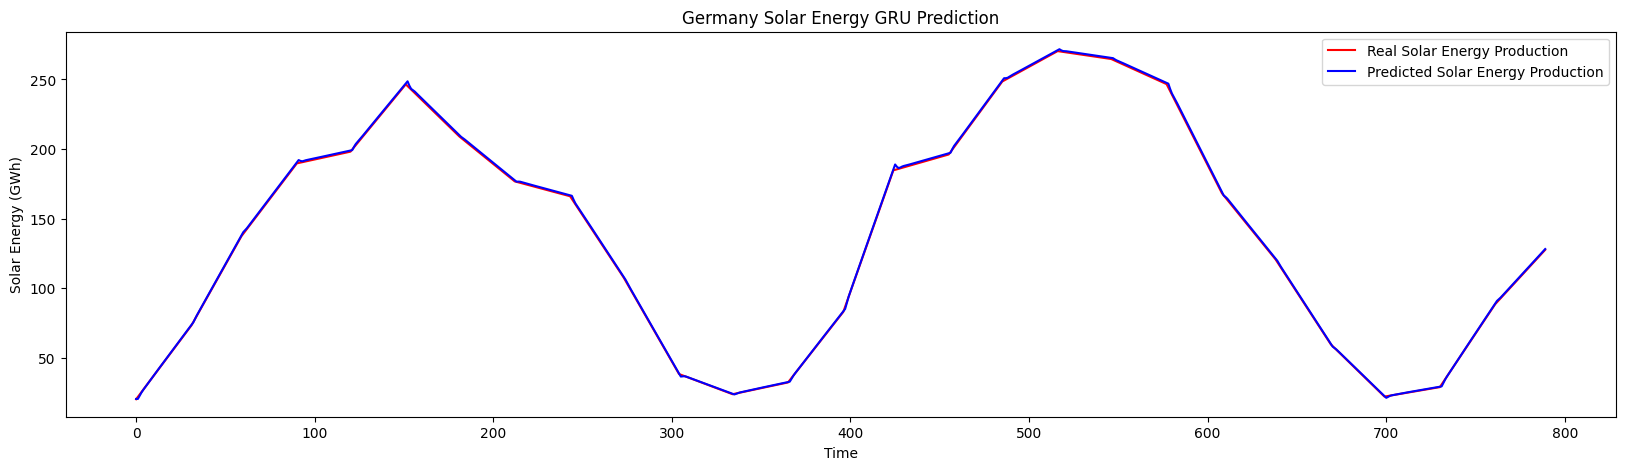

In [71]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(gru_y_pred, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('Germany Solar Energy GRU Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Univariate LSTM - Daily

In [72]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train[['Value']].values)

print(training_set_scaled)
print(training_set_scaled.shape)

[[0.01318834]
 [0.01399414]
 [0.01479994]
 ...
 [0.04546047]
 [0.04499518]
 [0.0445299 ]]
(4019, 1)


In [73]:
# Creating a data structure with 365 timestamps and 1 output
X_train = []
y_train = []
for i in range(time_steps, len(train)):
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [74]:
print(X_train)
X_train.shape

[[0.01318834 0.01399414 0.01479994 ... 0.01018468 0.00853728 0.00688988]
 [0.01399414 0.01479994 0.01560574 ... 0.00853728 0.00688988 0.00524248]
 [0.01479994 0.01560574 0.01641155 ... 0.00688988 0.00524248 0.00736635]
 ...
 [0.12170311 0.12255904 0.12607851 ... 0.04685631 0.04639103 0.04592575]
 [0.12255904 0.12607851 0.12959798 ... 0.04639103 0.04592575 0.04546047]
 [0.12607851 0.12959798 0.13311746 ... 0.04592575 0.04546047 0.04499518]]


(3654, 365)

In [75]:
print(y_train)
y_train.shape

[0.00524248 0.00736635 0.00949021 ... 0.04546047 0.04499518 0.0445299 ]


(3654,)

In [76]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [38]:
# Initialising the RNN
ger_daily_uni_lstm = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
ger_daily_uni_lstm.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
ger_daily_uni_lstm.add(Dropout(0.2))

ger_daily_uni_lstm.add(LSTM(units = 64, return_sequences = True))
ger_daily_uni_lstm.add(Dropout(0.2))

ger_daily_uni_lstm.add(LSTM(units = 64))
ger_daily_uni_lstm.add(Dropout(0.2))

# Adding the output layer
ger_daily_uni_lstm.add(Dense(units = 1))

In [39]:
# Compiling the RNN
ger_daily_uni_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
ger_daily_uni_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
115/115 [==============================] - 210s 1s/step - loss: 0.0130
Epoch 2/100
115/115 [==============================] - 129s 1s/step - loss: 0.0032
Epoch 3/100
115/115 [==============================] - 136s 1s/step - loss: 0.0024
Epoch 4/100
115/115 [==============================] - 136s 1s/step - loss: 0.0025
Epoch 5/100
115/115 [==============================] - 142s 1s/step - loss: 0.0022
Epoch 6/100
115/115 [==============================] - 141s 1s/step - loss: 0.0018
Epoch 7/100
115/115 [==============================] - 142s 1s/step - loss: 0.0016
Epoch 8/100
115/115 [==============================] - 128s 1s/step - loss: 0.0014
Epoch 9/100
115/115 [==============================] - 122s 1s/step - loss: 0.0014
Epoch 10/100
115/115 [==============================] - 116s 1s/step - loss: 0.0013
Epoch 11/100
115/115 [==============================] - 127s 1s/step - loss: 0.0014
Epoch 12/100
115/115 [==============================] - 126s 1s/step - loss: 0.0012
E

115/115 [==============================] - 94s 824ms/step - loss: 4.9122e-04
Epoch 95/100
115/115 [==============================] - 96s 831ms/step - loss: 5.4086e-04
Epoch 96/100
115/115 [==============================] - 97s 842ms/step - loss: 4.7899e-04
Epoch 97/100
115/115 [==============================] - 92s 797ms/step - loss: 4.7184e-04
Epoch 98/100
115/115 [==============================] - 93s 812ms/step - loss: 4.9378e-04
Epoch 99/100
115/115 [==============================] - 98s 855ms/step - loss: 4.9457e-04
Epoch 100/100
115/115 [==============================] - 88s 762ms/step - loss: 5.1715e-04


In [40]:
test[['Value']].shape

(790, 1)

In [77]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train['Value'], test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 365:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(time_steps, len(test)+time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
uni_lstm_y_pred = ger_daily_uni_lstm.predict(X_test)
uni_lstm_y_pred = sc.inverse_transform(uni_lstm_y_pred)

25/25 [==============================] - 30s 218ms/step


In [78]:
print("Mean Absolute Error: ", mean_absolute_error(uni_lstm_y_pred, test['Value'].values))
mse = mean_squared_error(uni_lstm_y_pred, test['Value'].values)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  3.1831768056085337
Mean Squared Error:  26.949447939382704
Root Mean Squared Error:  5.191285769381484


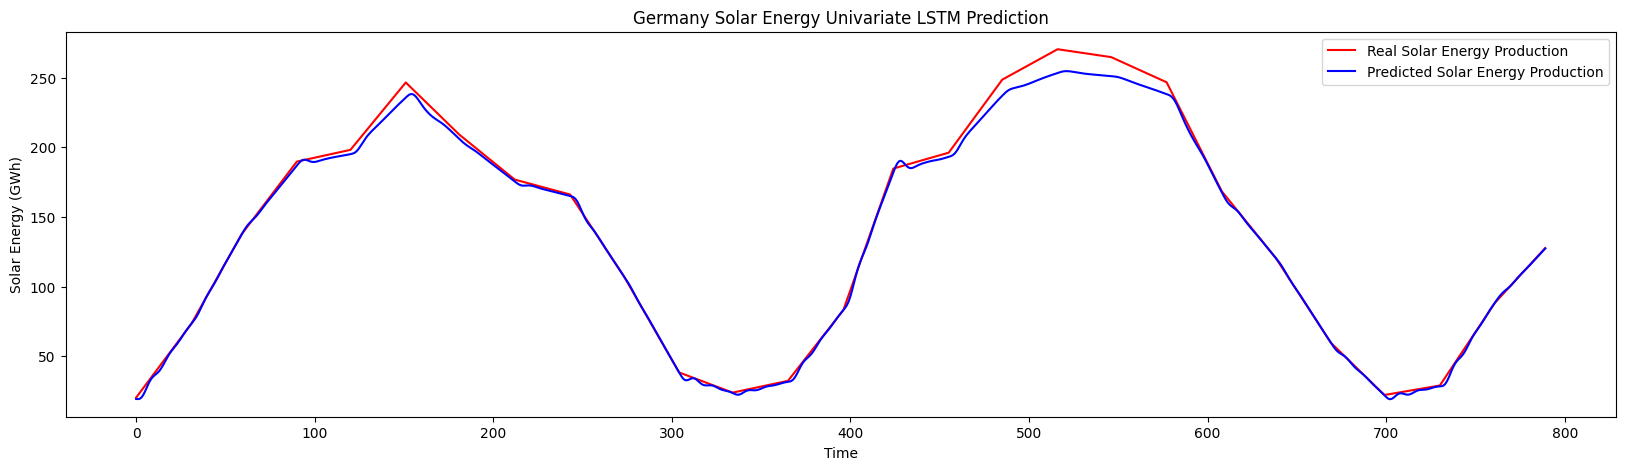

In [79]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(test['Value'].values, color = 'red', label = 'Real Solar Energy Production')
plt.plot(uni_lstm_y_pred, color = 'blue', label = 'Predicted Solar Energy Production')
plt.title('Germany Solar Energy Univariate LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

## Multivariate LSTM

In [80]:
data = solar_production_data['Germany']

data.shape

(4808, 5)

In [81]:
X = data[['Daylight', 'Temperature', 'GHI', 'DNI', 'Value']]
y = data[['Value']]

X.head()

,Daylight,Temperature,GHI,DNI,Value
Date,,,,,
2010-01-01,508.175450,-3.488258,129072.890000,43339.637000,13.672000
2010-01-02,511.151537,-3.386960,132367.476774,44804.124194,13.845266
2010-01-03,514.127624,-3.285661,135662.063548,46268.611387,14.018532
2010-01-04,517.103710,-3.184362,138956.650323,47733.098581,14.191798
2010-01-05,520.079797,-3.083064,142251.237097,49197.585774,14.365065


In [82]:
# Split the data into training and testing sets
split_date = '2021-01-01'
X_train, X_test = X[:split_date], X[split_date:]
y_train, y_test = y[:split_date], y[split_date:]

In [83]:
# Scale the features and target variables using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
X_train, X_test = X_scaler.fit_transform(X_train), X_scaler.transform(X_test)
y_train, y_test = y_scaler.fit_transform(y_train), y_scaler.transform(y_test)

In [84]:
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(4019, 5)
(790, 5)

(4019, 1)
(790, 1)


In [85]:
# Reshape the input data to fit the LSTM model (samples, time steps, features)
time_steps = 365  # Define the number of previous time steps to consider
n_features = X_train.shape[1]  # Number of features

# Creating a data structure with 365 timestamps and 1 output
X_train1 = []
y_train1 = []
for i in range(time_steps, len(X_train)):
    X_train1.append(X_train[i-time_steps:i])
    y_train1.append(y_train[i][0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

print(X_train1.shape)

(3654, 365, 5)


In [86]:
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], X_train1.shape[2]))

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

ger_daily_multi_lstm = Sequential()
ger_daily_multi_lstm.add(LSTM(units = 64, return_sequences = True, input_shape=(time_steps, n_features)))
ger_daily_multi_lstm.add(Dropout(0.2))
ger_daily_multi_lstm.add(LSTM(units = 64, activation = 'relu', return_sequences = True))
ger_daily_multi_lstm.add(Dropout(0.2))
ger_daily_multi_lstm.add(LSTM(units = 64))
ger_daily_multi_lstm.add(Dropout(0.2))
ger_daily_multi_lstm.add(Dense(1))

In [53]:
ger_daily_multi_lstm.compile(optimizer='adam', loss='mean_squared_error')

ger_daily_multi_lstm.fit(X_train1, y_train1, epochs=100, batch_size=32)

Epoch 1/100
115/115 [==============================] - 183s 990ms/step - loss: 0.0165
Epoch 2/100
115/115 [==============================] - 112s 976ms/step - loss: 0.0030
Epoch 3/100
115/115 [==============================] - 113s 978ms/step - loss: 0.0025
Epoch 4/100
115/115 [==============================] - 116s 1s/step - loss: 0.0022
Epoch 5/100
115/115 [==============================] - 119s 1s/step - loss: 0.0020
Epoch 6/100
115/115 [==============================] - 120s 1s/step - loss: 0.0026
Epoch 7/100
115/115 [==============================] - 122s 1s/step - loss: 0.0018
Epoch 8/100
115/115 [==============================] - 135s 1s/step - loss: 0.0018
Epoch 9/100
115/115 [==============================] - 127s 1s/step - loss: 0.0017
Epoch 10/100
115/115 [==============================] - 131s 1s/step - loss: 0.0015
Epoch 11/100
115/115 [==============================] - 125s 1s/step - loss: 0.0013
Epoch 12/100
115/115 [==============================] - 128s 1s/step - loss:

115/115 [==============================] - 98s 844ms/step - loss: 5.1095e-04
Epoch 94/100
115/115 [==============================] - 98s 848ms/step - loss: 5.0460e-04
Epoch 95/100
115/115 [==============================] - 83s 718ms/step - loss: 4.9488e-04
Epoch 96/100
115/115 [==============================] - 80s 700ms/step - loss: 5.3969e-04
Epoch 97/100
115/115 [==============================] - 72s 625ms/step - loss: 5.2445e-04
Epoch 98/100
115/115 [==============================] - 65s 567ms/step - loss: 5.3261e-04
Epoch 99/100
115/115 [==============================] - 65s 569ms/step - loss: 4.8639e-04
Epoch 100/100
115/115 [==============================] - 66s 572ms/step - loss: 4.8933e-04


In [87]:
X_total_data = X
inputs = X_total_data[len(X_total_data) - len(X_test) - 365:]
inputs = X_scaler.transform(inputs)
print(inputs.shape)
len(X_test)
X_test1 = []
for i in range(time_steps, len(X_test)+time_steps):
    X_test1.append(inputs[i-time_steps:i])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], X_test1.shape[2]))

multi_lstm_y_pred = ger_daily_multi_lstm.predict(X_test1)
multi_lstm_y_pred = y_scaler.inverse_transform(multi_lstm_y_pred)
real_value = y_scaler.inverse_transform(y_test)
hist_value = y_scaler.inverse_transform(y_train)
multi_lstm_y_pred

(1155, 5)
25/25 [==============================] - 24s 194ms/step


array([[ 20.2882  ],
       [ 20.317947],
       [ 20.373352],
       [ 20.563753],
       [ 21.02369 ],
       [ 21.85229 ],
       [ 23.211771],
       [ 25.054508],
       [ 27.196543],
       [ 29.408854],
       [ 31.487553],
       [ 33.34201 ],
       [ 34.971874],
       [ 36.442318],
       [ 37.866352],
       [ 39.395393],
       [ 41.167793],
       [ 43.22979 ],
       [ 45.525   ],
       [ 47.899475],
       [ 50.178524],
       [ 52.25186 ],
       [ 54.091084],
       [ 55.750423],
       [ 57.34693 ],
       [ 59.0074  ],
       [ 60.844482],
       [ 62.87833 ],
       [ 65.03507 ],
       [ 67.16218 ],
       [ 69.10956 ],
       [ 70.80725 ],
       [ 72.280785],
       [ 73.70697 ],
       [ 75.32727 ],
       [ 77.36713 ],
       [ 79.88849 ],
       [ 82.773735],
       [ 85.78409 ],
       [ 88.6367  ],
       [ 91.159164],
       [ 93.34098 ],
       [ 95.31287 ],
       [ 97.287964],
       [ 99.45533 ],
       [101.896866],
       [104.574394],
       [107.3

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(multi_lstm_y_pred, real_value))
mse = mean_squared_error(multi_lstm_y_pred, real_value)
print("Mean Squared Error: ", mse)
import math
print("Root Mean Squared Error: ",math.sqrt(mse))

Mean Absolute Error:  8.285218981302274
Mean Squared Error:  221.23949355536797
Root Mean Squared Error:  14.87412160617789


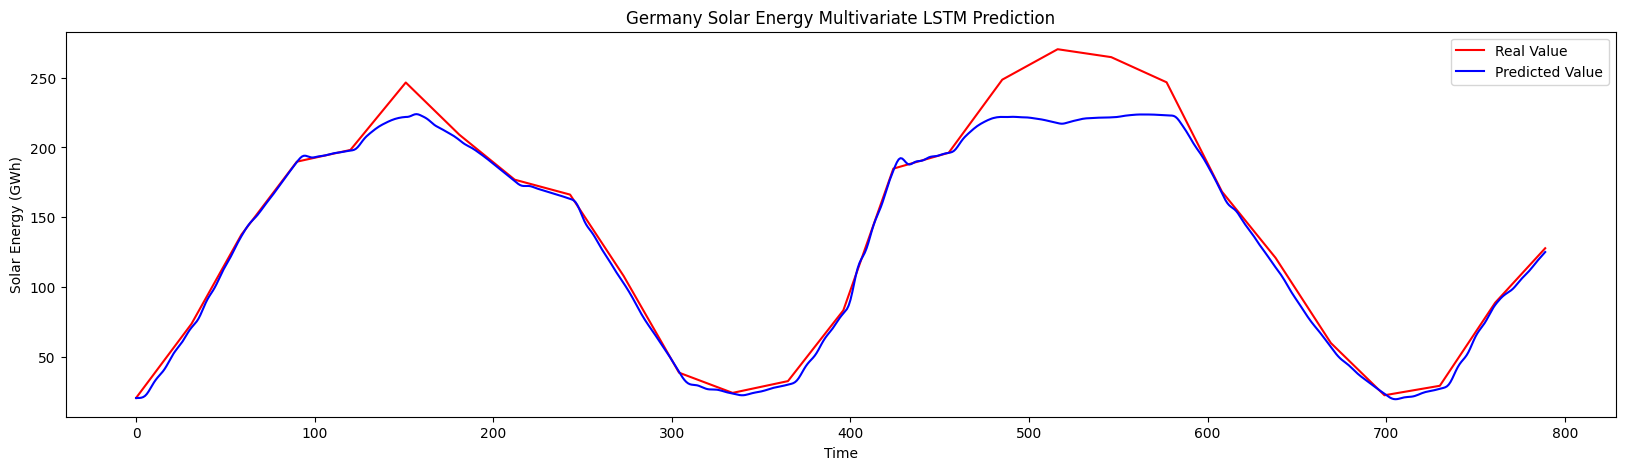

In [89]:
# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_value, color='red', label='Real Value')
plt.plot(multi_lstm_y_pred, color='blue', label='Predicted Value')
plt.title('Germany Solar Energy Multivariate LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

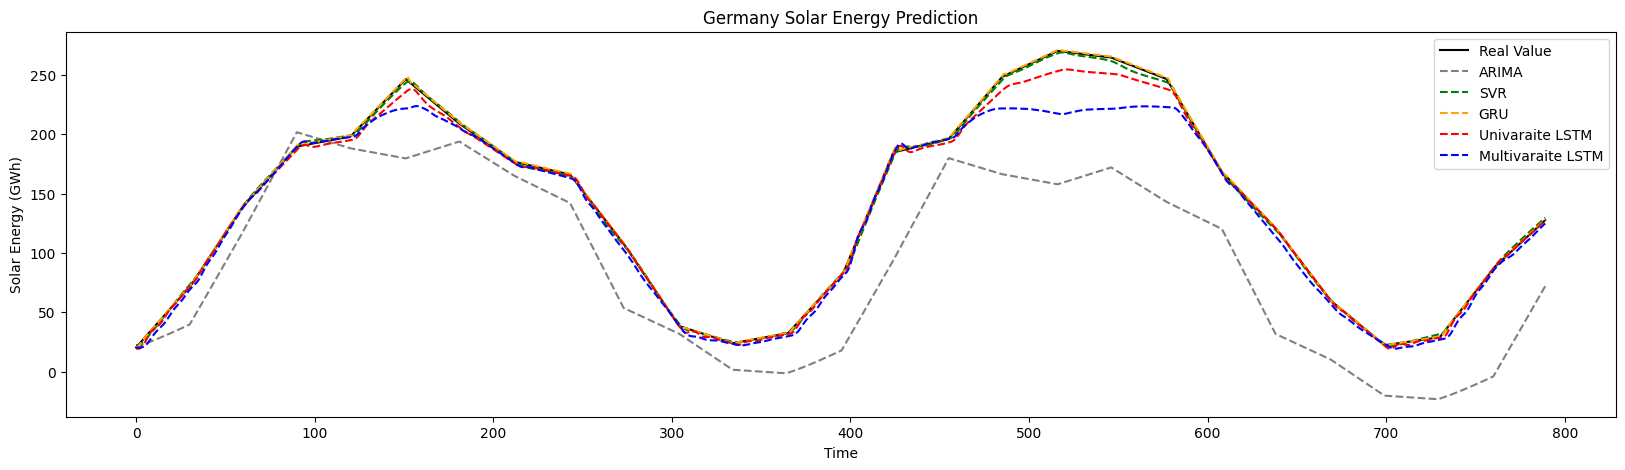

In [97]:
# Overview

# Visualising the results
plt.figure(figsize=(20,5))
plt.plot(real_value, color='black', label='Real Value')
plt.plot(predictions.rx('mean')[0], color='grey', linestyle='--', label='ARIMA')
plt.plot(svr_y_pred, color='green', linestyle='--', label='SVR')
plt.plot(gru_y_pred, color='orange', linestyle='--', label='GRU')
plt.plot(uni_lstm_y_pred, color='red', linestyle='--', label='Univaraite LSTM')
plt.plot(multi_lstm_y_pred, color='blue', linestyle='--', label='Multivaraite LSTM')
plt.title('Germany Solar Energy Prediction')
plt.xlabel('Time')
plt.ylabel('Solar Energy (GWh)')
plt.legend()
plt.show()

# Save Best Model

In [57]:
ger_daily_gru.save("ger_solar_best_gru.h5")

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
